In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [16]:
                                      #DESCRIÇÃO DOS DADOS
# ano = anos de expedição do alvara
# mes = mes de expedição
# categ_alvara = categoria do alvara

#------------------------------------------------------------------------------------------

# Alvara de Funcionamento,Autorizacao para Eventos,Local de Reunião                 1
# Atividade não Residencias Conforme Categoria de Uso                               2
# Código de Obras e Edificações e dá Outras Providências                            3
# Expedição por Via Eletronica do Alvará de Aprovação de Edificação Nova ou Reforma 4
# Alvara Condicionado                                                               5
# ATENDIMENTO DO GOVERNO                                                            6
# Código de Obras e Edificações do Município de São Paulo                           7

#-------------------------------------------------------------------------------------------

# status_binario = 1   DEFERIDO 
# status_binario = 2 INDEFERIDO

# CATEG_EMP = Categoria a qual a empresa pertence
# S/S    1
# S/A    2
# LTDA   3
# EIRELI 4
# EMPRESARIO OU MICROEMPRESARIO INDIVIDUAL 5 

In [4]:
dados = pd.read_csv('alvara_kmeans.csv', error_bad_lines=False, sep=",")

In [7]:
#visualização quantidade dos dados
dados.shape

#nossa base tem uma boa quantidade para trabalhar , como os dados são similares a sua densidade e alta

(10000, 4)

In [8]:
#visualização dos dados
dados.iloc[0:5]

,ano,categ_alvara,status_binario,categ_emp
0,2017,1,2,5
1,2017,1,2,5
2,2017,1,2,5
3,2017,1,1,5
4,2017,1,1,5


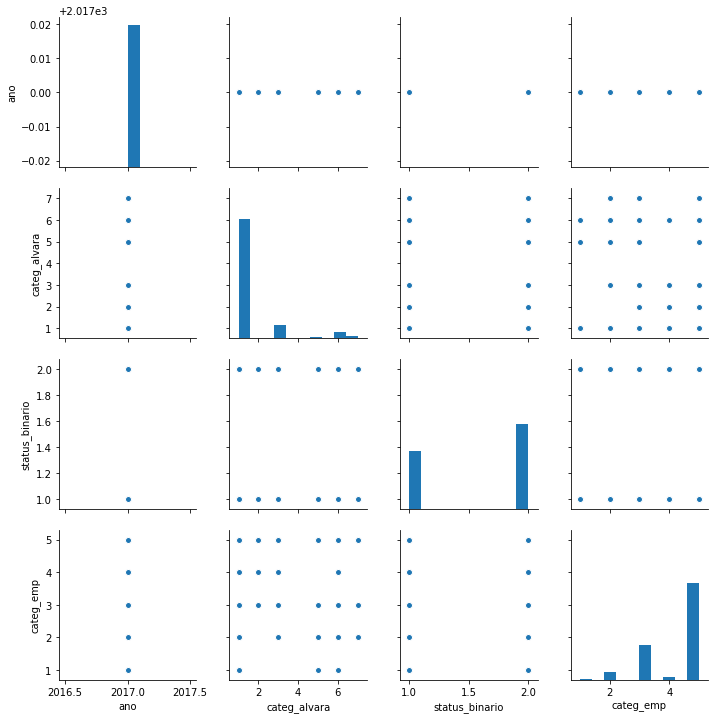

In [9]:
# vamos fazer uma visualizaçãos dos dados , para ver como eles são vistos sem nenhum tipo de alterção
sb.pairplot(dados)

In [26]:
#agora vamos rodar o KMeans , e utilizar as labels como matiz de cor para vermos os grupos criados
#vamos deixar o k igual a 9 para iniciarmos os testes.

kmeans = KMeans(n_clusters = 9,random_state=0)

In [27]:
#treinando o algoritmo
kmeans.fit(dados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [28]:
#visualização dos grupos (Labels) criadas
kmeans.labels_

array([1, 1, 1, ..., 1, 5, 3])

In [29]:
#passando os grupos criados para o DataSet
dados ['labels'] = kmeans.labels_

In [30]:
#Verificando a alteração no DataSet
dados.iloc[0:1000]

,ano,categ_alvara,status_binario,categ_emp,labels
0,2017,1,2,5,1
1,2017,1,2,5,1
2,2017,1,2,5,1
3,2017,1,1,5,2
4,2017,1,1,5,2
5,2017,3,1,3,8
6,2017,1,2,2,0
7,2017,1,1,5,2
8,2017,1,2,3,6
9,2017,1,2,5,1


In [31]:
# podemos ver que o Algoritmo conseguiu fazer uma boa separação , em algum momento a fronteira ficou muita parecida e
# o algoritmo não conseguiu separar corretamente

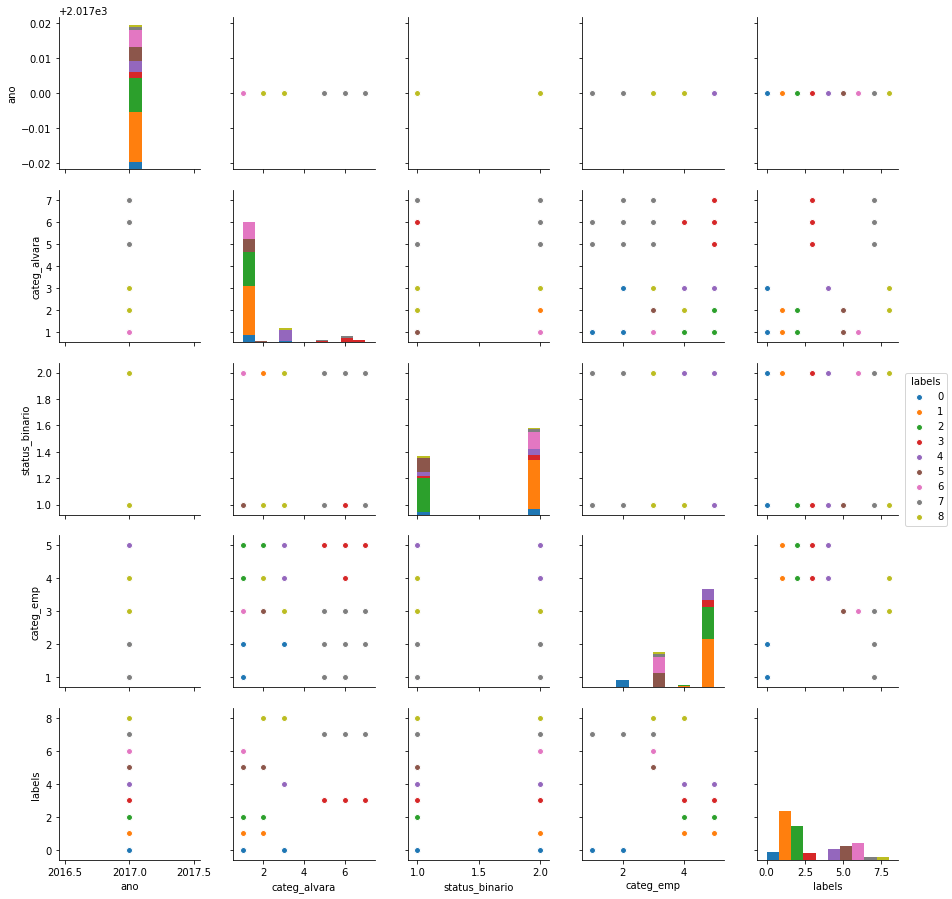

In [32]:
# O grafico abaixo mostra todas as dimensões , vamos utilizar as 
# Labels como matiz de cor para ver o DataSet com os grupos separados
sb.pairplot(dados,'labels')

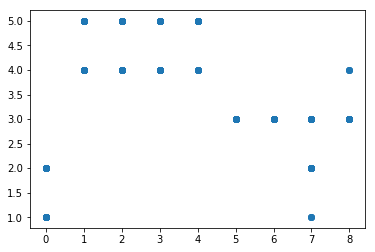

In [33]:
# O grafico de disperção abaixo mostra a dispersão das categorias de empresa entre as labels
x = dados['labels']
y = dados['categ_emp']
plt.scatter(x,y)

In [17]:
#podemo ver como os grupos de empresa foram distribuidos entra as labels

In [18]:
# diferente do aprendizado supervisionado onde conseguimos fazer uma matriz de confusão para
# ver a quantidade de acertos o não supervisionado não e possivel pois não sabemos oque queremos acertar
# iremos usar a validação silhouette onde atraves de calculos podemos idenetificar o melhor numero de clusters

In [19]:
X = dados

In [20]:
for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5442973069751355
For n_clusters=3, The Silhouette Coefficient is 0.6414068469749596
For n_clusters=4, The Silhouette Coefficient is 0.7748767749382865
For n_clusters=5, The Silhouette Coefficient is 0.8447413594540698
For n_clusters=6, The Silhouette Coefficient is 0.8443131222268712
For n_clusters=7, The Silhouette Coefficient is 0.8435426987409818
For n_clusters=8, The Silhouette Coefficient is 0.8620799301757622
For n_clusters=9, The Silhouette Coefficient is 0.900261363099737
For n_clusters=10, The Silhouette Coefficient is 0.9054138113498571


In [ ]:
#A tecnica silhouette varia de -1 a 1 , quanto mais proximo de 1 melhor , quando mais proximo de -1 pior 
#seguindo essa olgica podemos ver que o silhouette com 5 clusters foi o mais eficaz , depois disso os ganhos não são
#tão significativos 


1 51146.29569999999
2 31913.987015295577
3 16341.97235653731
4 6950.625571139937
5 3419.530137970361
6 2716.826093078907
7 2064.969308239003
8 1509.1324670412423
9 1161.5126587866855
10 966.4483755147115
11 814.3176522380473
12 611.8834046532828
13 508.7560993556856
14 420.18382512242886


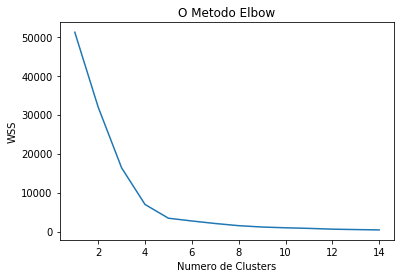

In [21]:
#vamos utilizar uma segunda forma de validação chamada elbow(cotovelo) onde o grafico lembra a forma de um depois de pronto
# iremos analisar se sua respota sera semelhante ao fo silhouette

#Tecnica de validação cotovelo

from sklearn.cluster import KMeans
wcss = []
 
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 15), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [1]:
#Podemos ver que a resultado do silhouette com 5 clusters foi de 0.8447413594540698 
# depois disso a almento não é tão significativo.
# na tecnica do cotovello , podemos imaginar que o numero 5 seria a dobra do cotovello , nos dois tipos de validação 
# o numero 5 se mostrou ideal.

In [5]:
kmeans = KMeans(n_clusters = 5,random_state=0)

In [6]:
kmeans.fit(dados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [7]:
kmeans.labels_

array([0, 0, 0, ..., 0, 2, 1])

In [8]:
dados ['labels'] = kmeans.labels_

In [9]:
dados.iloc[0:5]

,ano,categ_alvara,status_binario,categ_emp,labels
0,2017,1,2,5,0
1,2017,1,2,5,0
2,2017,1,2,5,0
3,2017,1,1,5,3
4,2017,1,1,5,3


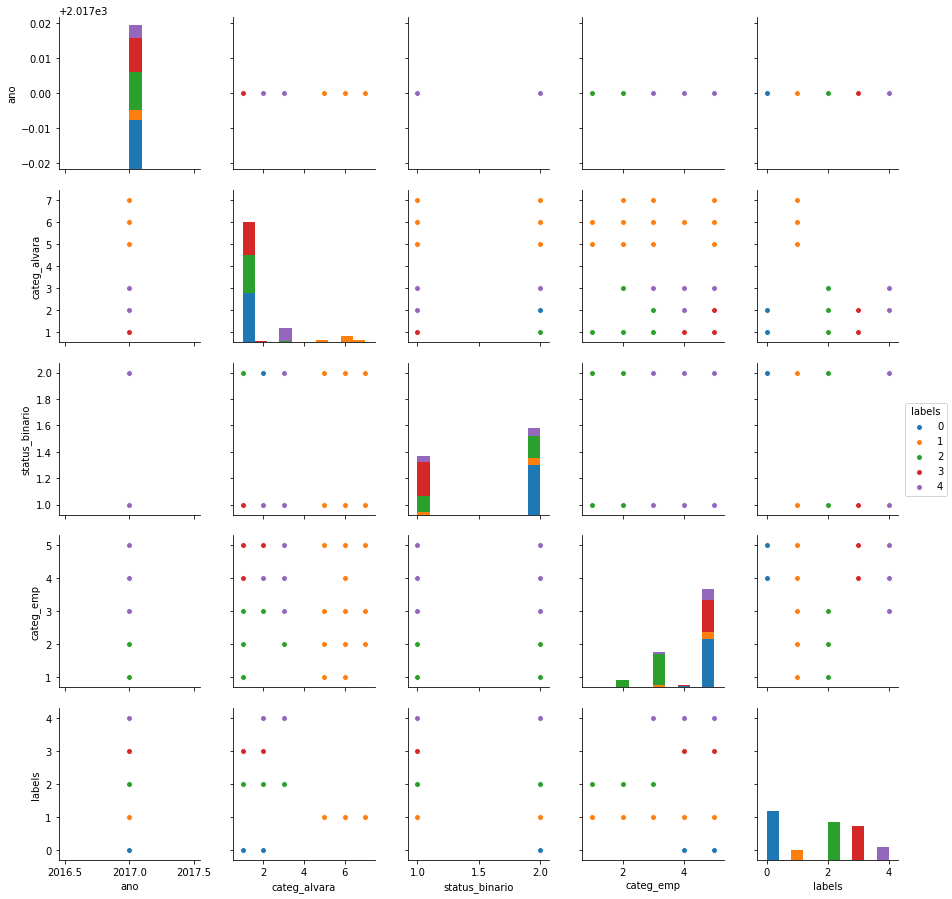

In [10]:
sb.pairplot(dados,'labels')